# Analyze Development EEG Data 

Analyze EEG data. 

In [47]:
from pathlib import Path

import numpy as np
# from scipy.stats import spearmanr, pearsonr
# import matplotlib.pyplot as plt

from antropy import app_entropy

# from fooof import FOOOF
from fooof.utils import trim_spectrum

from neurodsp.utils import create_times
from neurodsp.spectral import compute_spectrum
from neurodsp.plts import plot_time_series, plot_power_spectra

In [42]:
# Import custom code
import sys
sys.path.append(str(Path('..').resolve()))

from apm.plts import plot_dots
from apm.wrappers import specparam_wrapper, lempelziv_wrapper
from apm.wrappers import hjorth_complexity_wrapper, dfa_wrapper, hurst_wrapper, irasa_wrapper

## Settings

In [8]:
# Data path
data_path = Path('/Users/tom/Documents/Data/VoytekLab/ExtractedSubsets/childmind/')

In [9]:
# Define data information
fs = 500
n_seconds = 30

In [26]:
# Define times vector for data
times = create_times(n_seconds + 1/fs, fs)

## Load Data

In [27]:
# 
ages = np.load(data_path / 'ages.npy')
data = np.load(data_path / 'data.npy')

In [28]:
data.shape

(111, 15001)

In [29]:
len(ages)

111

## Data Checks

In [35]:
ind = 0

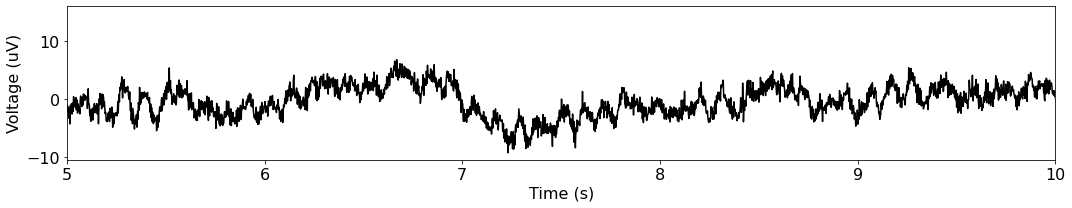

In [36]:
# Plot a segment of time series data
plot_time_series(times, data[ind, :], xlim=[5, 10])

In [39]:
# Compute a power spectrum of an example
freqs, powers = compute_spectrum(data[ind, :], fs, nperseg=2*fs, noverlap=fs)

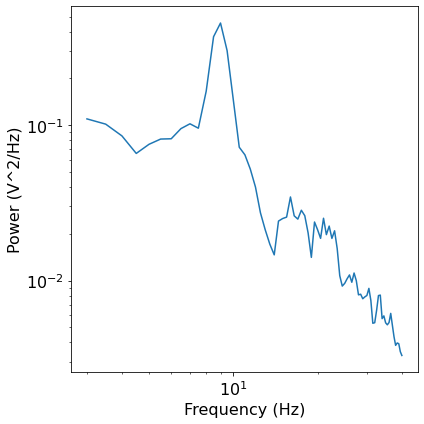

In [40]:
plot_power_spectra(*trim_spectrum(freqs, powers, [3, 40]))

## Compare Methods

This is a replication of the 

In [ ]:
# Initialize specparam model
fm = FOOOF(verbose=False)

In [44]:
# Settings for spectral parameterization
f_range = [3, 40]

In [48]:
# Define collectors for measures to run
measures = {'spexp' : [], 'irexp' : [], 'ent' : [],
            'hst' : [], 'dfa' : [], 'lpz' : [], 'hcx' : []}

# Calculate measures on data
for sig in data:
    
    # Compute aperiodic exponent from specparam & IRASA
    measures['spexp'].append(specparam_wrapper(sig, fs=fs, f_range=f_range))
    measures['irexp'].append(irasa_wrapper(sig, fs=fs, f_range=f_range))
                           
    # Compute entropy measure
    measures['ent'].append(app_entropy(sig))
    
    # Compute fluctuation measures
    #measures['hst'].append(hurst_wrapper(sig, fs=fs))
    #measures['dfa'].append(dfa_wrapper(sig, fs=fs))
    
    # Compute complexity measures
    measures['lpz'].append(lempelziv_wrapper(sig))
    measures['hcx'].append(hjorth_complexity_wrapper(sig))

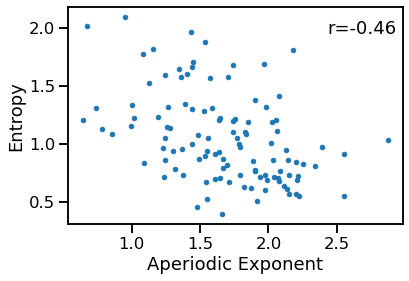

In [56]:
plot_dots(measures['spexp'], measures['ent'],
          xlabel='Aperiodic Exponent', ylabel='Entropy')

## Check Age Relationship

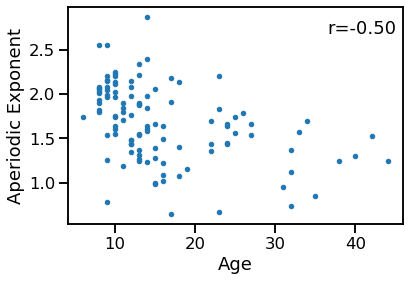

In [53]:
plot_dots(ages, measures['spexp'], 
          xlabel='Age', ylabel='Aperiodic Exponent')

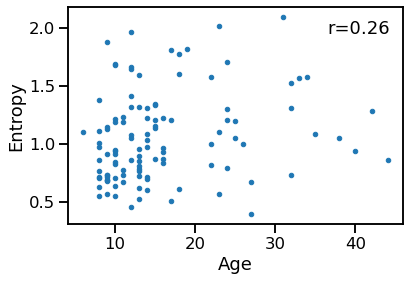

In [54]:
plot_dots(ages, measures['ent'], 
          xlabel='Age', ylabel='Entropy')

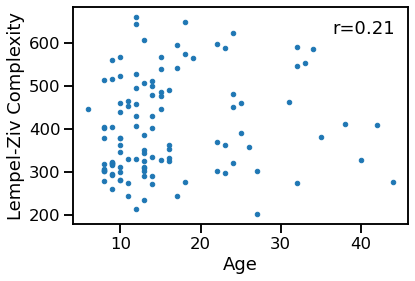

In [59]:
plot_dots(ages, measures['lpz'], 
          xlabel='Age', ylabel='Lempel-Ziv Complexity')

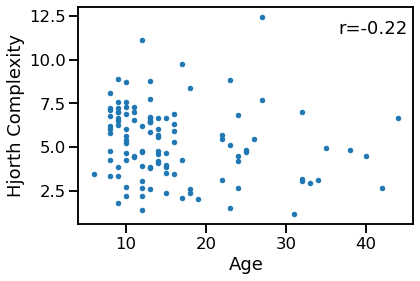

In [60]:
plot_dots(ages, measures['hcx'], 
          xlabel='Age', ylabel='Hjorth Complexity')